#Ejercicios

- Pruebe otras combinaciones de kernels para entrenar el regresor.

- Estudie la influencia del hiperparámetro alpha en los resultados.

- Entrene un regresor por procesos Gaussianos para la señal del punto 2.3 del [P1_CursoDirigido_Seminario_Pos.pdf](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/Parciales/P1_CursoDirigido_Seminario_Pos.pdf).



Sea la señal:

$$
t_n = A \sin(2\pi F_1 x_n) + B \cos(2\pi F_2 x_n) + \eta_n, \quad A, B \in \mathbb{R}
$$

contaminada con ruido blanco Gaussiano con $$ \text{SNR}_{\text{db}} = 2 \text{[dB]} $$. Asuma un mapeo $$ \phi(\cdot) $$ del tipo RBF, definido como:

$$
\phi(x_n) = [\mathcal{N}(x_n|\mu_q, \sigma_q^2)]_{q=1}^{Q}
$$

donde $$ Q = 20 $$, y

$$
p(w) = \mathcal{N}(w|m_0, S_0)
$$

Se deben simular 100 datos para entrenar los modelos y 20 para predecir, incluyendo un ciclo de la señal estudiada en la simulación.


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF , DotProduct, ConstantKernel, ExpSineSquared

from sklearn.model_selection import train_test_split

%matplotlib inline

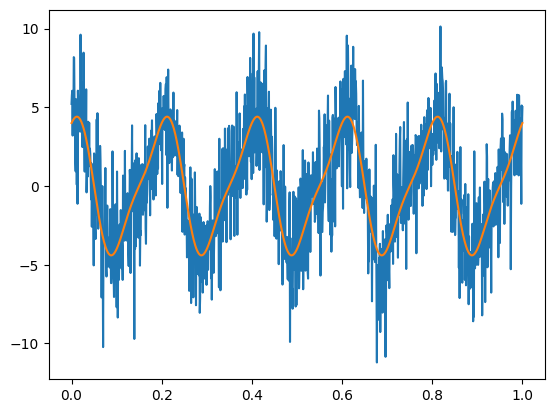

In [64]:
def var_snr(x,snrdB):
    Px = np.mean(x**2)
    return Px/(10**(snrdB/10))

N = 1200
f1 = 10
f2 = 5
A = 1
B = 4
snrdB = 2

t = np.linspace(0,1,N)
sig = A*np.sin(2*np.pi*f1*t) + B*np.cos(2*np.pi*f2*t)

var_noise = var_snr(sig, snrdB)

y = sig + np.random.normal(0, np.sqrt(var_noise), N)

X = t.reshape(-1,1)
Y = y.reshape(-1,1)

plt.plot(X,y)
plt.plot(t,sig)
plt.show()

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=200/N, random_state=42) #Dividimos nuestros datos 500 train 200 test
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1000, 1) (200, 1) (1000, 1) (200, 1)


In [ ]:
kernel = kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*RBF(length_scale=1,length_scale_bounds=(1e-1, 10.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*DotProduct(sigma_0=1.0, sigma_0_bounds=(1e-05, 100000.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(1e-05, 100000.0), periodicity_bounds=(1e-05, 100000.0))
alpha = 1e-3
 
def plot_gpr_samples(gpr_model, X, x, n_samples, ax,xlabel_="x",ylabel_="y"):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    X: input samples in N x P
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """


    y_mean, y_std = gpr_model.predict(X, return_std=True) #predicted output from gpr
    y_samples = gpr_model.sample_y(X, n_samples)


    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", lw=2)
    ax.fill_between(
        x,
        y_mean - 2*y_std,
        y_mean + 2*y_std,
        alpha=0.2,
        color="black",
        label=r"
 2 std. dev.",
    )
    ax.set_xlabel(xlabel_)
    ax.set_ylabel(ylabel_)
    #ax.set_ylim([-3, 3])


In [ ]:
ind_ = np.argsort(X_test,axis=0).reshape(-1)

#definir gpr
alpha = 0.1#*1/np.var(y_train)#1e-5
#kernel
kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*RBF(length_scale=1,length_scale_bounds=(1e-1, 10.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*DotProduct(sigma_0=1.0, sigma_0_bounds=(1e-05, 100000.0))+ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0))*ExpSineSquared(length_scale=1.0, periodicity=1.0, length_scale_bounds=(1e-05, 100000.0), periodicity_bounds=(1e-05, 100000.0))
#crear gpr
gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, random_state=0)#crear objeto gpr

